<a href="https://colab.research.google.com/github/jiyose12/machinelearning-IFPB/blob/master/projeto_wine_databaseMLP_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn import metrics
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import metrics

url = "https://raw.githubusercontent.com/victorx9999/MachineLearning/master/data/wine.data"
 
# Carregar base de dados
dataset = pd.read_csv(url, header=None)
 
columns = len(dataset.columns)
 
y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns - 1]
# print(X)
# print(columns)
# Transforma para Array NumPy
X = np.array(X)
y = np.array(y)

In [38]:
from sklearn.model_selection import StratifiedKFold
from collections import Counter
folds = 10
 
kf = StratifiedKFold(n_splits = folds)
 
## 10 conjuntos de dados
X_train = []
y_train = []
 
X_test = []
y_test = []
 
for train_index, test_index in kf.split(X,y):
  
  X_train.append(X[train_index])
  X_test.append(X[test_index])
  
  y_train.append(y[train_index])
  y_test.append(y[test_index])

In [39]:
wine_results = {
    'tree_entropy': [],
    'tree_gini': [],
    'knn5': [],
    'knn10': [],
    'mlp_tanh_51010': [],
    'mlp_relu_612': [],
    'mlp_tanh_612': [],
    'mlp_relu_51010': [],
    'kmeans': [],
} 
# Configuração do Kmeans
myset = set(y) # Cria um conjunto. Em conjuntos, dados não se repetem. Assim, esse conjunto conterá apenas um valor de cada
clusters = len(myset) # Quantos clusters teremos no KMeans

for i in range(folds):

  # MLP TANH
  mlpTanhModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='tanh', max_iter=3000, random_state=1)
  mlpTanhModel = mlpTanhModel.fit(X_train[i], y_train[i])
  mlpTanhResult = mlpTanhModel.predict(X_test[i])
  mlpTanhAcc = metrics.accuracy_score(mlpTanhResult, y_test[i])
  wine_results['mlp_tanh_51010'].append(round(mlpTanhAcc * 100))
  # mlpTanhAcertos.append(wine_results['mlp1'])
  # mlpTanhErros.append(100 - np.mean(mlpTanhAcertos))

  # MLP TANH 2.0
  mlpTanhModel2 = MLPClassifier(hidden_layer_sizes=(6,12), activation='tanh', max_iter=3000, random_state=1)
  mlpTanhModel2 = mlpTanhModel2.fit(X_train[i], y_train[i])
  mlpTanhResult2 = mlpTanhModel2.predict(X_test[i])
  mlpTanhAcc2 = metrics.accuracy_score(mlpTanhResult2, y_test[i])
  wine_results['mlp_tanh_612'].append(round(mlpTanhAcc2 * 100))
  # mlpTanhAcertosDif.append(wine_results['mlp3'])
  # mlpTanhErrosDif.append(100 - np.mean(mlpTanhAcertosDif))

  # MLP RELU
  mlpReluModel = MLPClassifier(hidden_layer_sizes=(6,12), activation="relu", max_iter=3000, random_state=1)
  mlpReluModel = mlpReluModel.fit(X_train[i], y_train[i])
  mlpReluResult = mlpReluModel.predict(X_test[i])
  mlpReluAcc = metrics.accuracy_score(mlpReluResult, y_test[i])
  wine_results['mlp_relu_612'].append(round(mlpReluAcc * 100))
  # mlpReluAcertos.append(wine_results['mlp2'])
  # mlpReluErros.append(100 - np.mean(mlpReluAcertos))

  #MLP RELU 2.0  
  mlpReluModel2 = MLPClassifier(hidden_layer_sizes=(5,10,10), activation="relu", max_iter=3000, random_state=1)
  mlpReluModel2 = mlpReluModel2.fit(X_train[i], y_train[i])
  mlpReluResult2 = mlpReluModel2.predict(X_test[i])
  mlpReluAcc2 = metrics.accuracy_score(mlpReluResult2, y_test[i])
  wine_results['mlp_relu_51010'].append(round(mlpReluAcc2 * 100))
  # mlpReluAcertosDif.append(wine_results['mlp4'])
  # mlpReluErrosDif.append(100 - np.mean(mlpReluAcertosDif))

 
  # ARVORE ENTROPY
  arvoreEntropyModel = tree.DecisionTreeClassifier(criterion="entropy")
  arvoreEntropyModel = arvoreEntropyModel.fit(X_train[i], y_train[i])
  arvoreEntropyresult = arvoreEntropyModel.predict(X_test[i])
  arvoreEntropyacc = metrics.accuracy_score(arvoreEntropyresult, y_test[i])
  wine_results['tree_entropy'].append(round(arvoreEntropyacc * 100))
  # arvoreEntropyAcertos.append(wine_results['tree_entropy'])
  # arvoreEntropyErros.append(100 - np.mean(arvoreEntropyAcertos))
 
  # ARVORE GINI
  arvoreGiniModel = tree.DecisionTreeClassifier(criterion="gini")
  arvoreGiniModel = arvoreGiniModel.fit(X_train[i], y_train[i])
  arvoreGiniresult = arvoreGiniModel.predict(X_test[i])
  arvoreGiniacc = metrics.accuracy_score(arvoreGiniresult, y_test[i])
  wine_results['tree_gini'].append(round(arvoreGiniacc * 100))
  # arvoreGiniAcertos.append(wine_results['tree_gini'])
  # arvoreGiniErros.append(100 - np.mean(arvoreGiniAcertos))

  # KNN 5
  knn5model = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='brute')
  knn5model = knn5model.fit(X_train[i], y_train[i])
  result_knn5 = knn5model.predict(X_test[i])
  knn5acc = metrics.accuracy_score(result_knn5, y_test[i])
  wine_results['knn5'].append(round(knn5acc * 100))
  # knn5Acertos.append(wine_results['knn5'])
  # knn5Erros.append(100 - np.mean(knn5Acertos))

  # KNN 10
  knn10model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', algorithm='brute')
  knn10model = knn10model.fit(X_train[i], y_train[i])
  result_knn10 = knn10model.predict(X_test[i])
  knn10acc = metrics.accuracy_score(result_knn10, y_test[i])
  wine_results['knn10'].append(round(knn10acc * 100))
  # knn10Acertos.append(wine_results['knn10'])
  # knn10Erros.append(100 - np.mean(knn10Acertos))

  # KMEANS
  KMeansModel = KMeans(n_clusters = clusters)
  KMeansModel = KMeansModel.fit(X_train[i])
  # Pegar os labels dos padrões de Treinamento
  labels = KMeansModel.labels_

  map_labels = []

  for i in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for i in range(len(y_train[i])):
    for c in range(clusters):
      if labels[i] == c:
        map_labels[c].append(new_y_train[i])

  # print(map_labels)

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for i in range(clusters):
    final = Counter(map_labels[i]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[i] = value

  # print(mapping)
  result = KMeansModel.predict(X_test[i])
  result = [mapping[j] for j in result]

  acc = metrics.accuracy_score(result, y_test[i])
  wine_results['kmeans'].append(round(acc * 100))

In [41]:
print('MLP TANH (5,10,10)')
print(round(np.mean(wine_results['mlp_tanh_51010'])))
print("MLP TANH (6,12)")
print(round(np.mean(wine_results['mlp_tanh_612'])))
print('MLP RELU (5,10,10)')
print(round(np.mean(wine_results['mlp_relu_51010'])))
print("MLP RELU (6,12)")
print(round(np.mean(wine_results['mlp_relu_612'])))
print("ARVORE GINI")
print(round(np.mean(wine_results['tree_gini'])))
print("ARVORE ENTROPY")
print(round(np.mean(wine_results['tree_entropy'])))
print("KNN 5")
print(round(np.mean(wine_results['knn5'])))
print("KNN 10")
print(round(np.mean(wine_results['knn10'])))
print("KMEANS")
print(round(np.mean(wine_results['kmeans'])))





MLP TANH (5,10,10)
82.0
MLP TANH (6,12)
59.0
MLP RELU (5,10,10)
92.0
MLP RELU (6,12)
56.0
ARVORE GINI
86.0
ARVORE ENTROPY
90.0
KNN 5
74.0
KNN 10
76.0
KMEANS
72.0


MLP Relu 5,10,10


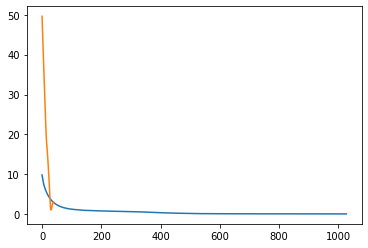

In [46]:
# Gráfico de Perdas MLPs
import matplotlib.pyplot as plt

# print("MLP Tahn 5,10,10")
# mlpTanhModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='tanh', max_iter=3000, random_state=1)
# mlpTanhModel = mlpTanhModel.fit(X_train[0], y_train[0])
# plt.plot(mlpTanhModel.loss_curve_)
print("MLP Relu 5,10,10")
mlpReluModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='relu', max_iter=3000, random_state=1)
mlpReluModel = mlpReluModel.fit(X_train[0], y_train[0])
plt.plot(mlpReluModel.loss_curve_)
# print("MLP Tahn 6,12")
# mlpTanhModel2 = MLPClassifier(hidden_layer_sizes=(6,12), activation='tanh', max_iter=3000, random_state=1)
# mlpTanhModel2 = mlpTanhModel2.fit(X_train[0], y_train[0])
# plt.plot(mlpTanhModel2.loss_curve_)
# print("MLP Relu 6,12")
mlpReluModel2 = MLPClassifier(hidden_layer_sizes=(6,12), activation='relu', max_iter=3000, random_state=1)
mlpReluModel2 = mlpReluModel2.fit(X_train[0], y_train[0])
plt.plot(mlpReluModel2.loss_curve_)

In [47]:
pd.DataFrame.from_dict(wine_results, orient='index')

,0,1,2,3,4,5,6,7,8,9
tree_entropy,94.0,94.0,67.0,89.0,89.0,100.0,94.0,94.0,100.0,76.0
tree_gini,89.0,89.0,72.0,89.0,83.0,83.0,100.0,89.0,94.0,76.0
knn5,67.0,83.0,67.0,61.0,67.0,72.0,72.0,83.0,82.0,88.0
knn10,78.0,83.0,72.0,78.0,72.0,61.0,89.0,72.0,76.0,82.0
mlp_tanh_51010,56.0,83.0,67.0,50.0,78.0,100.0,100.0,94.0,88.0,100.0
mlp_relu_612,56.0,50.0,61.0,56.0,44.0,56.0,50.0,61.0,59.0,71.0
mlp_tanh_612,44.0,61.0,67.0,50.0,50.0,72.0,56.0,67.0,76.0,47.0
mlp_relu_51010,89.0,89.0,89.0,89.0,78.0,94.0,100.0,94.0,100.0,94.0
kmeans,72.0,72.0,72.0,72.0,72.0,72.0,72.0,67.0,72.0,72.0


In [24]:
# Inicio do Kmeans

myset = set(y) # Cria um conjunto. Em conjuntos, dados não se repetem. Assim, esse conjunto conterá apenas um valor de cada, ou seja: [1,2,3]
clusters = len(myset) # Quantos clusters teremos no KMeans

for i in range(folds):
  model = KMeans(n_clusters = clusters)
  model = model.fit(X_train[i])
  # Pegar os labels dos padrões de Treinamento
  labels = model.labels_

  map_labels = []

  for i in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for i in range(len(y_train[i])):
    for c in range(clusters):
      if labels[i] == c:
        map_labels[c].append(new_y_train[i])

  # print(map_labels)

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for i in range(clusters):
    final = Counter(map_labels[i]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[i] = value

  # print(mapping)
  result = model.predict(X_test[i])
  result = [mapping[j] for j in result]

  acc = metrics.accuracy_score(result, y_test[i])
  show = round(acc * 100)
  print("{}%".format(show))

  print(list(result))
  print(list(y_test[i]))

72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
67.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3]
[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
72.0%
[1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3]
[1, 1, 1, 1

In [ ]:
# successMLP1 = [x for x in range(len(mlpTanhAcertos))]
# failureMLP1 = [x for x in range(len(mlpTanhErros))]
# plt.bar(successMLP1, mlpTanhAcertos, color='green')
# plt.bar(failureMLP1, mlpTanhErros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico do MLP Tanh na arquitetura (5,10,10)')
# plt.show()

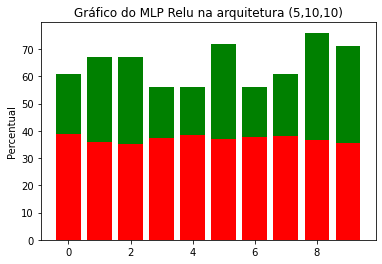

In [ ]:
# successMLP2 = [x for x in range(len(mlpReluAcertos))]
# failureMLP2 = [x for x in range(len(mlpReluErros))]
# plt.bar(successMLP2, mlpReluAcertos, color='green')
# plt.bar(failureMLP2, mlpReluErros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico do MLP Relu na arquitetura (5,10,10)')
# plt.show()

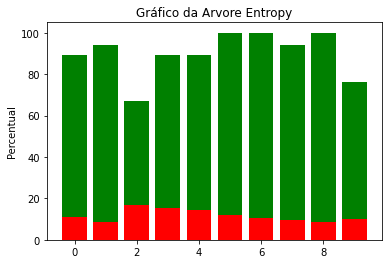

In [ ]:
# successTreeEntropy = [x for x in range(len(arvoreEntropyAcertos))]
# failureTreeEntropy = [x for x in range(len(arvoreEntropyErros))]
# plt.bar(successTreeEntropy, arvoreEntropyAcertos, color='green')
# plt.bar(failureTreeEntropy, arvoreEntropyErros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico da Arvore Entropy')
# plt.show()

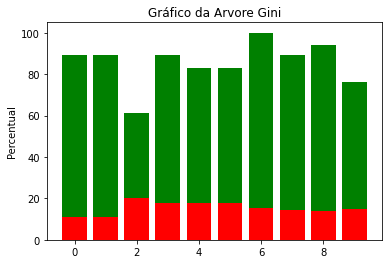

In [ ]:
# successTreeGini = [x for x in range(len(arvoreGiniAcertos))]
# failureTreeGini = [x for x in range(len(arvoreGiniErros))]
# plt.bar(successTreeGini, arvoreGiniAcertos, color='green')
# plt.bar(failureTreeGini, arvoreGiniErros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico da Arvore Gini')
# plt.show()

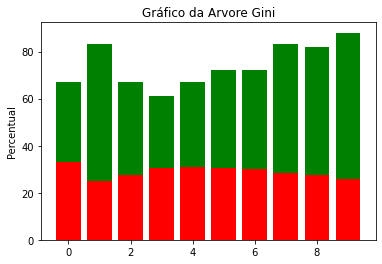

In [ ]:
# successKnn5 = [x for x in range(len(knn5Acertos))]
# failureKnn5 = [x for x in range(len(knn5Erros))]
# plt.bar(successKnn5, knn5Acertos, color='green')
# plt.bar(failureKnn5, knn5Erros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico da Arvore Gini')
# plt.show()

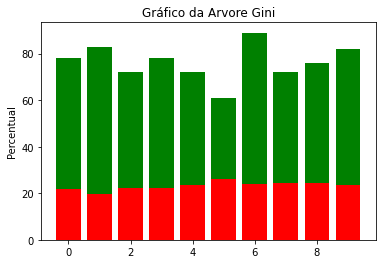

In [ ]:
# successKnn10 = [x for x in range(len(knn10Acertos))]
# failureKnn10 = [x for x in range(len(knn10Erros))]
# plt.bar(successKnn10, knn10Acertos, color='green')
# plt.bar(failureKnn10, knn10Erros, color='red')
# plt.ylabel('Percentual')
# plt.title('Gráfico da Arvore Gini')
# plt.show()